In [ ]:
import re
from google.colab import files
import shutil, os
from datetime import datetime
import cv2
from IPython.display import Image, display, Markdown

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.53 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━

In [ ]:
uploaded = files.upload()
orig_name = next(iter(uploaded))

Saving another_queue.jpg to another_queue.jpg


In [ ]:
base_clean = re.sub(r'\s\(\d+\)', '', os.path.splitext(orig_name)[0])
ext = os.path.splitext(orig_name)[1]

In [ ]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
unique_name = f"{base_clean}_{timestamp}{ext}"

In [ ]:
yolo_input_path = f"/content/yolov5/{unique_name}"
shutil.move(orig_name, yolo_input_path)

'/content/yolov5/another_queue_20250601_054258.jpg'

In [ ]:
image_path = yolo_input_path
filename = os.path.basename(image_path)

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.3 --source {image_path} --classes 0 --save-txt

detect: weights=['yolov5s.pt'], source=/content/yolov5/another_queue_20250601_054258.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/another_queue_20250601_054258.jpg: 512x640 6 persons, 389.0ms
Speed: 3.0ms pre-process, 389.0ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3
1 labels saved to runs/detect/exp3/labels


In [ ]:
exp_dir = sorted(os.listdir("/content/yolov5/runs/detect"))[-1]
output_img_path = f"/content/yolov5/runs/detect/{exp_dir}/{filename}"
label_path = f"/content/yolov5/runs/detect/{exp_dir}/labels/{filename.rsplit('.', 1)[0]}.txt"
print(exp_dir)
print(output_img_path)
print(label_path)

exp3
/content/yolov5/runs/detect/exp3/another_queue_20250601_054258.jpg
/content/yolov5/runs/detect/exp3/labels/another_queue_20250601_054258.txt


In [ ]:
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
        people_count = sum(1 for line in lines if line.strip().startswith('0'))
else:
    people_count = 0

In [ ]:
img = cv2.imread(output_img_path)
cv2.putText(img, f"People Count: {people_count}", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
cv2.imwrite(output_img_path, img)

True

### 🖼️ Input Image:

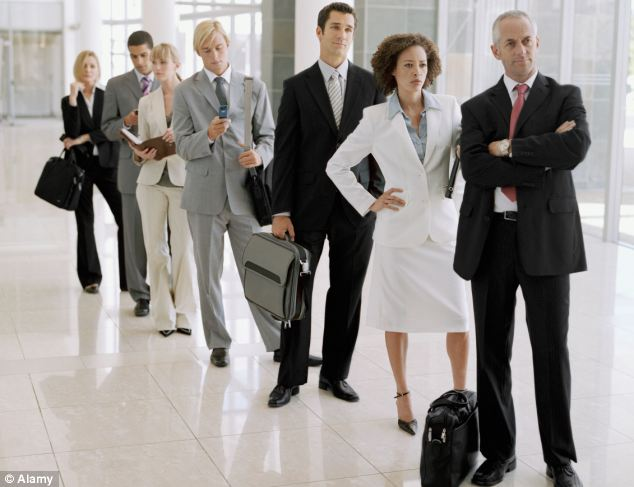

### 🖼️ Output Image:

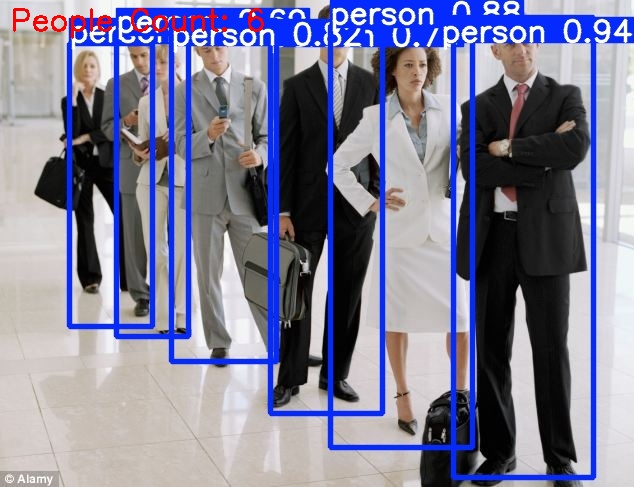

## ✅ Number of people in the queue: **6**

In [ ]:
display(Markdown("### 🖼️ Input Image:"))
display(Image(filename=image_path))

# if investigation of boxes needed
# display(Markdown("### 🖼️ Output Image:"))
# display(Image(filename=output_img_path))

display(Markdown(f"## ✅ Number of people in the queue: **{people_count}**"))